## Fase 2: Visualización

In [1]:
# importamos las librerías que necesitamos

# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd

# Visualización
# ------------------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt

# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

In [2]:
# Lectura fichero 
df_cust= pd.read_csv("customer_limpio.csv")

In [34]:
df_cust.head()

,loyalty_number,year,month,flights_booked,flights_with_companions,total_flights,distance,points_accumulated,points_redeemed,dollar_cost_points_redeemed,country,province,city,postal_code,gender,education,salary,marital_status,loyalty_card,clv,enrollment_type,enrollment_year,enrollment_month
0,100018,2017,1,3,0,3,1521,152.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.00,Married,Aurora,7919.20,Standard,2016,8
1,100102,2017,1,10,4,14,2030,203.0,0,0,Canada,Ontario,Toronto,M1R 4K3,Male,College,79371.73,Single,Nova,2887.74,Standard,2013,3
2,100140,2017,1,6,0,6,1200,120.0,0,0,Canada,British Columbia,Dawson Creek,U5I 4F1,Female,College,79371.73,Divorced,Nova,2838.07,Standard,2016,7
3,100214,2017,1,0,0,0,0,0.0,0,0,Canada,British Columbia,Vancouver,V5R 1W3,Male,Bachelor,63253.00,Married,Star,4170.57,Standard,2015,8
4,100272,2017,1,0,0,0,0,0.0,0,0,Canada,Ontario,Toronto,P1L 8X8,Female,Bachelor,91163.00,Divorced,Star,6622.05,Standard,2014,1


### Preguntas

1. ¿Cómo se distribuye la cantidad de vuelos reservados por mes durante el año?


In [11]:
vuelo_book= df_cust.groupby('month')['flights_booked'].sum().reset_index()
vuelo_book

,month,flights_booked
0,1,96936
1,2,96334
2,3,131199
3,4,112511
4,5,142170
5,6,173242
6,7,193431
7,8,169204
8,9,136379
9,10,129461


/var/folders/fz/6pfhl_yj00jd3p96rvwr5zjh0000gn/T/ipykernel_1628/1233025425.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="month", y="flights_booked", data=vuelo_book, palette="viridis")


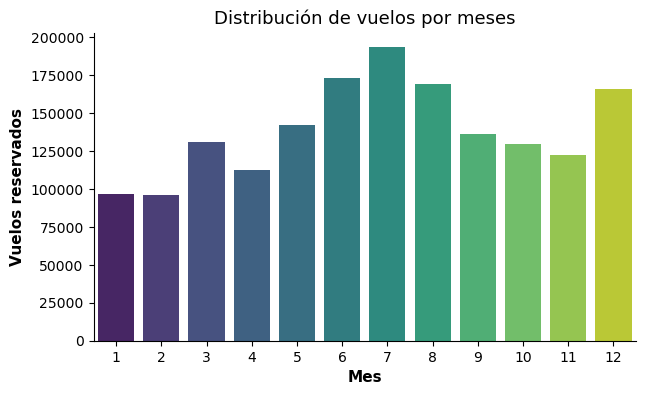

In [12]:
# Crear la figura
fig, ax = plt.subplots(figsize=(7, 4))
sns.barplot(x="month", y="flights_booked", data=vuelo_book, palette="viridis")

# Etiqueta del eje Y con ajustes de tamaño
plt.ylabel('Vuelos reservados', fontsize=11, weight='bold') 
plt.xlabel('Mes', fontsize=11, weight='bold')
ax.spines['top'].set_visible(False)     # Ocultar línea superior
ax.spines['right'].set_visible(False)   # Ocultar línea derecha

#Titulo
plt.title("Distribución de vuelos por meses", fontsize = 13);

`Análisis:`
Se observa una mayor frecuencia de reserva de vuelos durante los meses Junio, Julio, Agosto y Diciembre. Los meses con menor reserva son Enero y Febrero.

2. ¿Existe una relación entre la distancia de los vuelos y los puntos acumulados por los clientes?

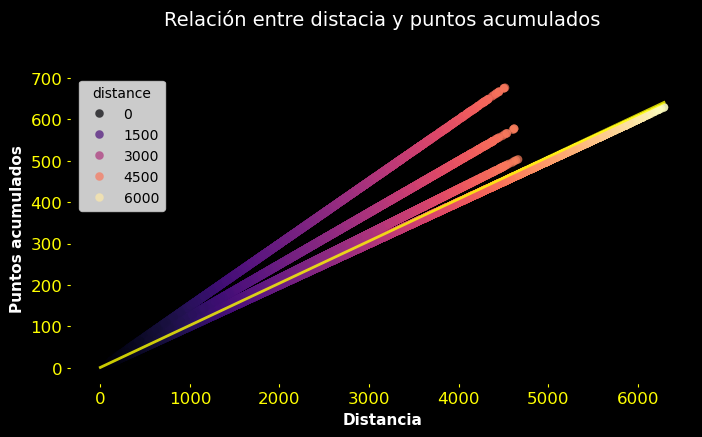

In [7]:

# Crear la figura
fig, ax = plt.subplots(figsize=(8, 4))
fig.patch.set_facecolor('black')  # Cambiar el fondo de toda la figura a negro
ax.set_facecolor('black')    

# Figura 1 Gráfico de dispersión
scatter = sns.scatterplot(
    x="distance",
    y="points_accumulated",
    hue="distance",            
    palette="magma",                
    alpha=0.7,
    edgecolor=None,  
    linewidth=0.1,
    data=df_cust,
    ax=ax,
)

# Gráfico de regresión
sns.regplot(
    x='distance', 
    y='points_accumulated', 
    scatter=False, 
    color='yellow', 
    line_kws={"linewidth": 2, 'alpha': 0.8},
    data=df_cust,  # Usar muestra para la regresión también
    ax=ax
)


# Ajustar las etiquetas de los ejes 
ax.set_xlabel("Distancia", fontsize=11, color='white', weight='bold')
ax.set_ylabel("Puntos acumulados", fontsize=11, color='white', weight='bold')

# Cambiar el fondo de los ejes para hacerlo negro
ax.spines['top'].set_visible(False)     # Ocultar línea superior
ax.spines['right'].set_visible(False)   # Ocultar línea derecha
ax.spines['left'].set_linewidth(2.5)    # Hacer la línea del eje Y más gruesa
ax.spines['bottom'].set_linewidth(2.5)  # Hacer la línea del eje X más gruesa
ax.spines['left'].set_color('black')   # Cambiar el color de la línea del eje Y 
ax.spines['bottom'].set_color('black') # Cambiar el color de la línea del eje Y 

# Cambiar el color de los números de los ejes a amarillo
ax.tick_params(axis='x', colors='yellow', labelsize=12)  # Cambiar el color y tamaño de los números del eje X a amarillo
ax.tick_params(axis='y', colors='yellow', labelsize=12)  # Cambiar el color y tamaño de los números del eje Y a amarillo


# Título para la gráfica
plt.title('Relación entre distacia y puntos acumulados', fontsize=14, color='white', pad=35);



`Análisis` Se observa una relación positiva fuerte entre distancia recorrida y puntos acumulados. Por lo que se espera que a mayor distancia mayor cantidad de puntos acumulados. 

3. ¿Cuál es la distribución de los clientes por provincia o estado?

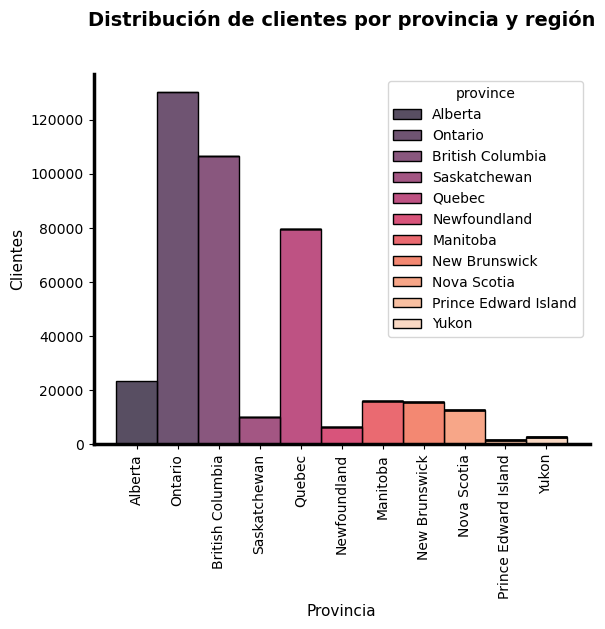

In [15]:
# Crear la figura 
fig, ax = plt.subplots()
sns.histplot(x="province", hue="province", data=df_cust, ax=ax, palette='rocket', multiple="stack")

# Ajustes de etiquetas con color y tamaño de fuente 
ax.set_xlabel("Provincia", fontsize=11, color='black')  
ax.set_ylabel("Clientes", fontsize=11, color='black')        

# Ajustes para rotar las etiquetas del eje X
plt.xticks(rotation=90)

# Personalizar los ejes
ax.spines['top'].set_visible(False)     # Ocultar línea superior
ax.spines['right'].set_visible(False)   # Ocultar línea derecha
ax.spines['left'].set_linewidth(2.5)    # Hacer la línea del eje Y más gruesa
ax.spines['bottom'].set_linewidth(2.5)  # Hacer la línea del eje X más gruesa

# Título para la gráfica
plt.title('Distribución de clientes por provincia y región', fontsize=14, color='black', pad=35, loc='center', weight='bold')

plt.show()


`Análisis` Se puede observa que hay más clientes en la provincia de Ontario, British Columnbia y Quebec, mientras que Yukon y Prince Edward Island tiene menos clientes. Lo cual puede ser clave para el equipo de ventas o mercadeo al segmentar y enfocar sus estrategias en las zonas con mayor cantidad de clientes.

4. ¿Cómo se compara el salario promedio entre los diferentes niveles educativos de
los clientes?

In [6]:
educacion_salario= df_cust.groupby('education')['salary'].mean().round(2).reset_index()
educacion_salario

,education,salary
0,Bachelor,72599.08
1,College,79371.73
2,Doctor,178403.68
3,High School or Below,61146.38
4,Master,103734.52


/var/folders/fz/6pfhl_yj00jd3p96rvwr5zjh0000gn/T/ipykernel_1628/3918399470.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="education", y="salary", data=educacion_salario, palette="mako")


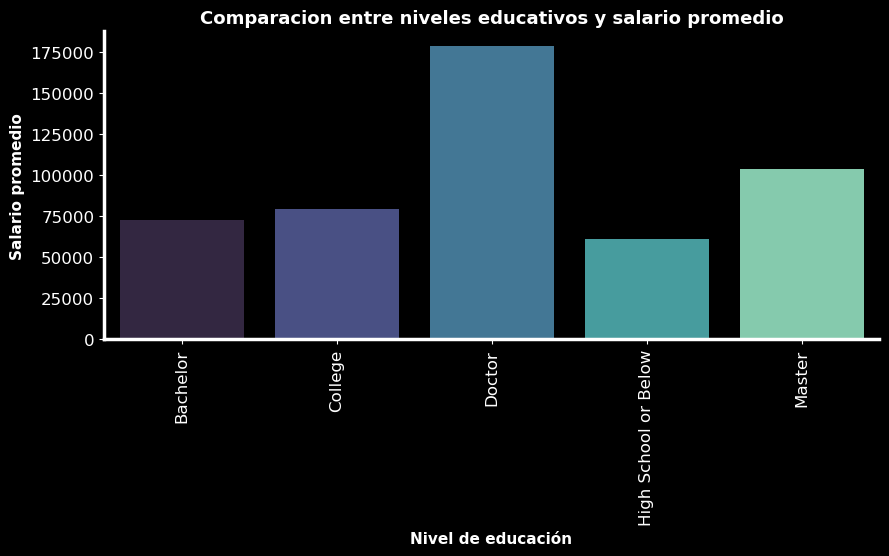

In [16]:
# Creación de figura
fig, ax = plt.subplots(figsize=(10, 4))
fig.patch.set_facecolor('black')  # Cambiar el fondo de toda la figura a negro
ax.set_facecolor('black')         # Cambiar el fondo del área de los ejes a negro

sns.barplot(x="education", y="salary", data=educacion_salario, palette="mako")

# Etiqueta del eje Y con ajustes de color y tamaño
plt.ylabel("Salario promedio", fontsize=11, weight='bold', color= "white" )
plt.xlabel('Nivel de educación', fontsize=11, weight='bold', color= "white")
plt.title("Comparacion entre niveles educativos y salario promedio", fontsize = 13,color= "white", loc='center', weight='bold')

# Personalizar los ejes 
ax.spines['top'].set_visible(False)     # Ocultar la línea superior
ax.spines['right'].set_visible(False)   # Ocultar la línea derecha
ax.spines['left'].set_linewidth(2.5)    # Hacer más gruesa la línea del eje Y
ax.spines['bottom'].set_linewidth(2.5)  # Hacer más gruesa la línea del eje X
ax.spines['left'].set_color('white')   # Cambiar el color de la línea del eje Y 
ax.spines['bottom'].set_color('white'); # Cambiar el color de la línea del eje



# Cambiar el color de los números de los ejes
ax.tick_params(axis='x', colors='white', labelsize=12)  
ax.tick_params(axis='y', colors='white', labelsize=12)  
# Ajustes para rotar las etiquetas del eje X
plt.xticks(rotation=90);

`Análisis:` Los clientes con un nivel educativo más alto como doctorado y master, tiene un salario promedio entre 100.000 a 175.000 dólares. Aquellos que tienen un nivel de estudio entre Bachelor y College tienen un promedio de salario similar que ronda en las 76.000 dolares auales. Esto es clave para hacer programas de lealtad diferenciados para estos segmentos de clientes, o para analizar a profundidad el comportamiento de compra de vuelos. 

5. ¿Cuál es la proporción de clientes con diferentes tipos de tarjetas de fidelidad?

In [51]:
df_cust["loyalty_number"].value_counts()

loyalty_number
974875    48
736504    48
890702    48
617489    48
200519    47
          ..
428402    24
428452    24
428520    24
428523    24
999891    24
Name: count, Length: 16737, dtype: int64

In [18]:
# Al tener varios duplicados, en la BBDD original primero eliminaremos duplicados en "loyalty_number" para contabilizar por cliente.
clientes_unicos = df_cust.drop_duplicates(subset="loyalty_number")

In [56]:
client_tarjeta = clientes_unicos.groupby("loyalty_card")["loyalty_number"].count().reset_index()
client_tarjeta

,loyalty_card,loyalty_number
0,Aurora,3429
1,Nova,5671
2,Star,7637


In [67]:
client_tarjeta["proporcion"] = ((client_tarjeta["loyalty_number"] / client_tarjeta["loyalty_number"].sum())*100).round(2)


In [68]:
client_tarjeta

,loyalty_card,loyalty_number,proporcion
0,Aurora,3429,20.49
1,Nova,5671,33.88
2,Star,7637,45.63


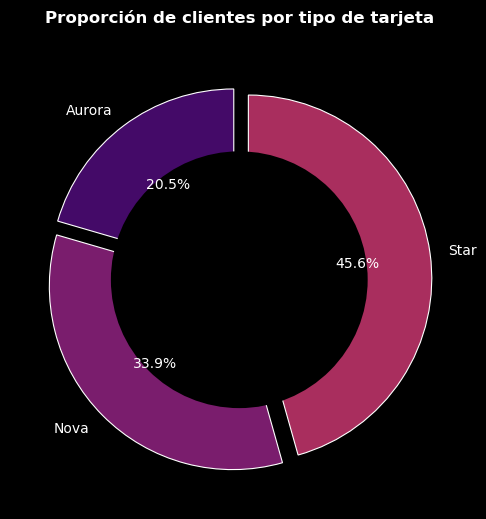

In [73]:
# Creacion de figura
fig, ax = plt.subplots(figsize=(5, 8), facecolor='black')


wedges, texts, autotexts = ax.pie(client_tarjeta["proporcion"],
    labels=client_tarjeta["loyalty_card"],  # Etiquetas de las tarjetas
    autopct='%1.1f%%',  # Mostrar porcentajes en el gráfico
    colors=plt.cm.inferno(client_tarjeta["proporcion"] / 100),  # Colores basados en proporción
    startangle=90,
    wedgeprops={'edgecolor': 'white', 'linewidth': 0.8},  # Bordes blancos y más delgados
    explode=[0.05] * len(client_tarjeta["loyalty_card"])  # Separar todas las secciones para resaltarlas
)

# Añadir un círculo en el centro para dar el efecto de "doughnut"
centre_circle = plt.Circle((0, 0), 0.70, fc='black')
fig.gca().add_artist(centre_circle)

# Añadir un título al gráfico centrado
plt.title('Proporción de clientes por tipo de tarjeta', color='white', fontsize=12, weight='bold', pad=20, loc='center')

# Ajustar el color del texto de las etiquetas y porcentajes
plt.setp(texts, color='white')  # Cambiar el color de las etiquetas a blanco
plt.setp(autotexts, color='white')  # Cambiar el color de los porcentajes a blanco

# Ajustar la visualización para asegurar que todo se ve adecuadamente
plt.tight_layout()

# Mostrar la gráfica
plt.show()


`Análisis:` Casi la mitad de los clientes tiene tarjeta de fidelidad  Star con un 45,6%. Le sigue Nova con un 33,9% y Aurora con un 20,5%. Se podría decir que hay una distribución equilibrada en general, sin tener una dominancia de un tipo u otro.

6. ¿Cómo se distribuyen los clientes según su estado civil y género?

In [19]:
clientes_info= clientes_unicos.groupby(['gender','marital_status'])['loyalty_number'].count().reset_index()


In [20]:
# Unimos gender con marital_status
clientes_info['gender_marital_status'] = clientes_info['gender'] + ' - ' + clientes_info['marital_status']

clientes_info= clientes_info.drop(['gender','marital_status'], axis=1)


In [21]:
clientes_info

,loyalty_number,gender_marital_status
0,1269,Female - Divorced
1,4869,Female - Married
2,2272,Female - Single
3,1249,Male - Divorced
4,4866,Male - Married
5,2212,Male - Single


/var/folders/fz/6pfhl_yj00jd3p96rvwr5zjh0000gn/T/ipykernel_1628/2136940055.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="gender_marital_status", y="loyalty_number", data=clientes_info, palette="mako")


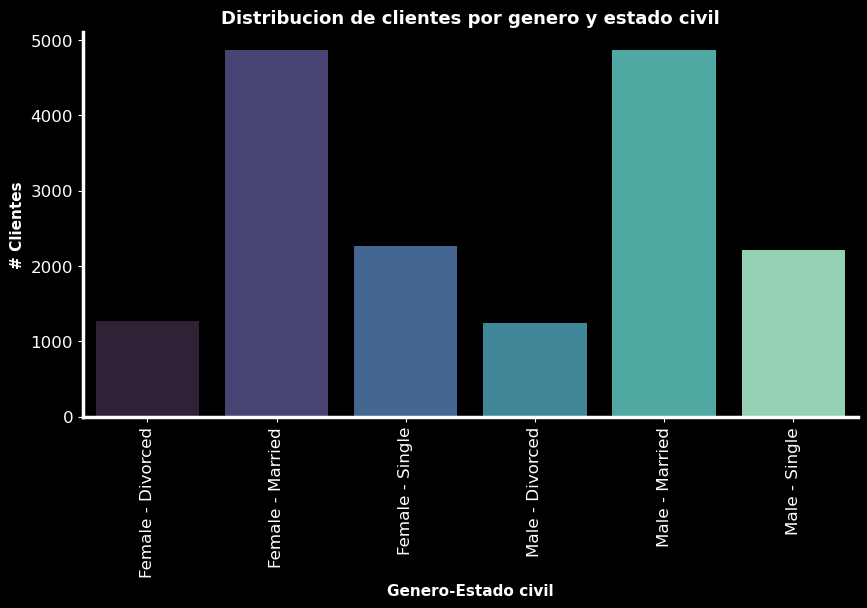

In [22]:
# Creación gráfica
fig, ax = plt.subplots(figsize=(10, 5))
fig.patch.set_facecolor('black')  
ax.set_facecolor('black')         

sns.barplot(x="gender_marital_status", y="loyalty_number", data=clientes_info, palette="mako")

# Etiqueta del eje Y con ajustes de color y tamaño
plt.ylabel("# Clientes", fontsize=11, weight='bold', color= "white" )
plt.xlabel('Genero-Estado civil', fontsize=11, weight='bold', color= "white")
plt.title("Distribucion de clientes por genero y estado civil", fontsize = 13,color= "white", weight='bold')

# Personalizar los ejes (spines) 
ax.spines['top'].set_visible(False)     # Ocultar la línea superior
ax.spines['right'].set_visible(False)   # Ocultar la línea derecha
ax.spines['left'].set_linewidth(2.5)    # Hacer más gruesa la línea del eje Y
ax.spines['bottom'].set_linewidth(2.5)  # Hacer más gruesa la línea del eje X
ax.spines['left'].set_color('white')   # Cambiar el color de la línea del eje Y 
ax.spines['bottom'].set_color('white'); # Cambiar el color de la línea del eje



# Cambiar el color de los números de los ejes a
ax.tick_params(axis='x', colors='white', labelsize=12) 
ax.tick_params(axis='y', colors='white', labelsize=12) 

# Rotar las etiquetas del eje X
plt.xticks(rotation=90);

`Análisis: ` Se observa que la mayor cantidad de clientes son mujeres casadas y hombres casados. Seguido de  mujeres y hombres solteros, con una diferencia de aproximadamente la mitad de clientes.